# Validação Holdout

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets as ds
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Dados Sinteticos

In [2]:
X,y = make_classification( n_samples=20000,
                            n_features=2,
                            n_informative=2,
                            n_redundant=0,
                            random_state=42)

X,X_prod,y,y_prod = train_test_split(X,y,test_size=0.2,random_state=42)

In [3]:
df = pd.DataFrame(X)
df.shape

(16000, 2)

## Não há Separação dos dados

In [4]:
# Define o modelo
model = DecisionTreeClassifier(max_depth=38)
model.fit(X,y)

#Classification sobre os dados de treinamento
y_hat = model.predict(X)
acc = accuracy_score(y,y_hat)
acc

1.0

## Publicação do Modelo em Produção

In [5]:
yhat_prod = model.predict( X_prod)
acc_prod = accuracy_score(y_prod,yhat_prod)

acc_prod

0.8805

## Estratégia Treino-Teste

In [6]:
# separa os dados em Treinamento e teste

X_train,X_teste,y_train,y_teste= train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
#Modelo Treinado com os dados de treinamento

model = DecisionTreeClassifier(max_depth=38)
model.fit(X_train,y_train)

#Classificação sobre os dados de teste

yhat_test = model.predict(X_teste)
acc = accuracy_score(y_teste, yhat_test)
acc

0.8825

## Escplha os parametros do Algoritimo

In [8]:
values = [i for i in range (1,60)]

teste_score = []
for i in values:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,y_train)

    # classificação sobre o teste
    yhat_test = model.predict(X_teste)
    acc_test = accuracy_score(y_teste, yhat_test)

    teste_score.append(acc_test)

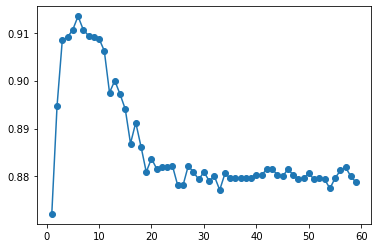

In [9]:
plt.plot(values, teste_score,'-o',label='teste')

## Publicacção do Algoritmo em produção

In [10]:
# Modelo Treinado e Validado
model_last = DecisionTreeClassifier( max_depth=6 )
model_last.fit( np.concatenate( (X_train,X_teste) ), 
               np.concatenate( (y_train,y_teste) ) ) # Usado quando não se tem dados o suficiente, pode ocasionar overfit devido a mistura do treino com teste
yhat_prod = model_last.predict( X_prod)

acc_prod = accuracy_score( y_prod , yhat_prod)
acc_prod

0.91375

# 2.0 Estratégia Valudation Holdout ( Treino-Valudação-Test )

In [11]:
#usando quando se tem dados para isso

#Separacao entre Treino e Validção e Teste
X,y = make_classification( n_samples=20000,
                            n_features=2,
                            n_informative=2,
                            n_redundant=0,
                            random_state=42)

X_train,X_temp,y_train,y_temp= train_test_split( X_train,y_train, test_size=0.2,random_state=42)

X_val,X_test,y_val,y_test= train_test_split( X_temp,y_temp, test_size=0.5,random_state=42)



In [12]:
values = [i for i in range (1,60)]

val_score = []
for i in values:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,y_train)

    # classificação sobre o teste
    yhat_val = model.predict(X_val)
    acc_val = accuracy_score(y_val, yhat_val)

    val_score.append( acc_val)

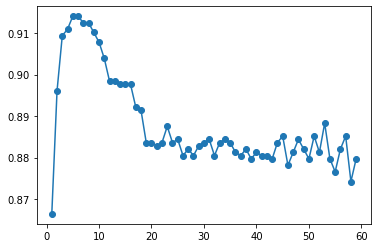

In [13]:
plt.plot(values, val_score,'-o',label='validação')

In [14]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train,y_train)
yhat_val = model.predict(X_val)
acc_val = accuracy_score(y_val, yhat_val)
print(f'Qual e a Capacidade do Algoritmo prever dados validação? \n {acc_val}')


Qual e a Capacidade do Algoritmo prever dados validação? 
 0.9140625


In [15]:
# Testando a capacidade de Generalização do modelo para dados que ele nunca viu
model_last = DecisionTreeClassifier(max_depth=5)

model_last.fit(np.concatenate( (X_train,X_val) ), 
               np.concatenate( (y_train,y_val) ) )

y_hat_test = model_last.predict( X_test )
acc_prod = accuracy_score(y_test,y_hat_test)

print(f'Qual e a Capacidade do Algoritmo prever dados que ele nunca viu? \n {acc_prod}')

Qual e a Capacidade do Algoritmo prever dados que ele nunca viu? 
 0.90390625


Deve se retreinar o modelo de tempos em tempos para garantir que o modelo esteja o melhor possivel